<a href="https://colab.research.google.com/github/Ganeshsawant01/Gold-price-prediction/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importin libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data collection and processing

In [ ]:
#loading the csv data to pandas dataframe
gold_data= pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#getting some basic info about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the missung value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting statistical mesures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1.Positive correlation

2.Negative correlation

In [ ]:
correlation= gold_data.corr()

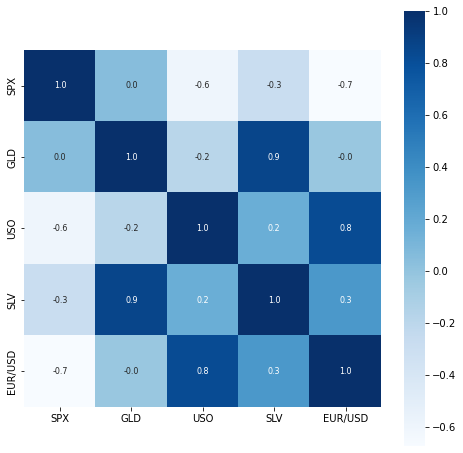

In [ ]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True ,square=True ,fmt='.1f', annot=True ,annot_kws={'size':8},cmap='Blues')

In [ ]:
#correlation values of GLD
print(correlation ['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


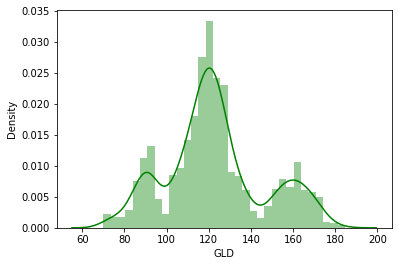

In [ ]:
#checking ditribution of the gold price 
sns.distplot(gold_data['GLD'],color='green')

splitting the features and target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis =1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Spltting into training data and test data

In [ ]:
X_train ,X_test, Y_train , Y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

Model training:

Random forest regression

In [ ]:
regression= RandomForestRegressor(n_estimators=100)


In [ ]:
#training the model
regression.fit(X_train ,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model evoualtion

In [ ]:
#prediction on Test data
test_data_prediction =regression.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.56779939  82.10539977 116.1242     127.72170064 120.81200098
 154.57879773 150.24109887 126.1309005  117.51009863 126.07270039
 116.86030105 172.1961009  141.95859882 167.83479844 115.16780024
 117.58190045 140.19110289 170.15550098 159.29390312 161.78499931
 154.99470054 125.22990031 175.84909953 157.708402   125.2807003
  93.90159986  77.64630002 120.68710021 119.10199969 167.63959955
  88.11150065 125.14010034  91.04140064 117.59710035 121.14909864
 136.16780094 115.32550114 115.14850042 147.42819966 107.19930102
 104.15820222  87.08949798 126.41610056 118.13109997 154.33179947
 119.53609998 108.22800021 107.91099819  93.12990068 127.08009772
  74.0327008  113.57889911 121.25570001 111.33759952 118.89599906
 120.86709925 159.03959997 169.1017009  147.13489684  85.79739876
  94.30490039  86.85959909  90.65010037 118.9674007  126.3866006
 127.70850006 169.01180032 122.23099921 117.43449877  98.4521003
 168.82920202 142.67909812 131.59540242 121.28000198 121.41029926
 119.73160036

In [ ]:
#R suqared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:' ,error_score)

R squared error: 0.9897932868334959


Compare the actual values and predicted values in plot

In [ ]:
Y_test =list(Y_test)

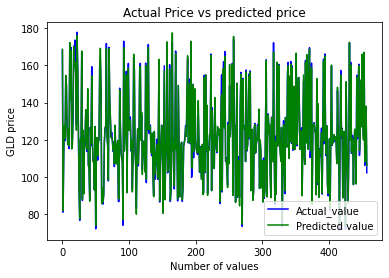

In [34]:
plt.plot(Y_test ,color='blue',label='Actual_value')
plt.plot(test_data_prdeiction, color='green', label='Predicted value')
plt.title('Actual Price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()